In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import copy
import seaborn as sns
%matplotlib inline

In [3]:
def layer_size(X_train, Y_train):
    in_layer = X_train.shape[0]
    out_layer = Y_train.shape[0]
    return in_layer, out_layer


In [4]:
def init_param(in_layer, out_layer):
    W = np.random.randn(out_layer, in_layer) * 0.01
    b = np.zeros((out_layer, 1))
    
    params = {
        "W": W,
        "b": b
    }
    
    return params

In [5]:
def forward_propagation(X_train, W, b):
    y_hat = np.dot(W, X_train) + b
    return y_hat


In [6]:
def compute_cost(Y_train, y_hat):
    cost = np.mean(np.power(y_hat - Y_train, 2)) / 2
    return cost


In [7]:
def back_propagation(X_train, Y_train, y_hat):
    m = X_train.shape[1]
    dz = y_hat - Y_train
    dw = np.dot(dz, X_train.T) / m
    db = np.sum(dz, axis=1, keepdims=True) / m
    grads = {
        "dW": dw,
        "db": db
    }
    
    return grads

In [8]:
def train(X_train, Y_train, alpha, n):
    
    in_layer, out_layer = layer_size(X_train, Y_train)
    params = init_param(in_layer, out_layer)
    cost_ = []
    
    for _ in range(n):
        y_hat = forward_propagation(X_train, params["W"], params["b"])
        cost = compute_cost(Y_train, y_hat)
        grads = back_propagation(X_train, Y_train, y_hat)
        
        params["W"] -= grads["dW"] * alpha
        params["b"] -= grads["db"] * alpha
        cost_.append(cost)
    
    return params, cost_

In [9]:
def predict(X, params):
    y_hat = np.dot(params["W"], X) + params["b"]
    return y_hat


In [10]:
path = "/home/sam/Documents/projects/machine_learning/data/houses.txt"
with open(path) as file:
    data = pd.read_csv(file)
    
print(data)
print(data.columns)

    9.520000000000000000e+02  2.000000000000000000e+00  \
0                     1244.0                       3.0   
1                     1947.0                       3.0   
2                     1725.0                       3.0   
3                     1959.0                       3.0   
4                     1314.0                       2.0   
..                       ...                       ...   
94                    1224.0                       2.0   
95                    1432.0                       2.0   
96                    1660.0                       3.0   
97                    1212.0                       3.0   
98                    1050.0                       2.0   

    1.000000000000000000e+00  6.500000000000000000e+01  \
0                        1.0                      64.0   
1                        2.0                      17.0   
2                        2.0                      42.0   
3                        2.0                      15.0   
4            

In [11]:
X = np.array([data["9.520000000000000000e+02"],
             data["2.000000000000000000e+00"],
             data["1.000000000000000000e+00"],
             data["6.500000000000000000e+01"]])
Y = np.array(data["2.715000000000000000e+02"])

print(X.shape)
print(X[:, :10])
print(Y.shape)
print(Y)

(4, 99)
[[1.244e+03 1.947e+03 1.725e+03 1.959e+03 1.314e+03 8.640e+02 1.836e+03
  1.026e+03 3.194e+03 7.880e+02]
 [3.000e+00 3.000e+00 3.000e+00 3.000e+00 2.000e+00 2.000e+00 3.000e+00
  3.000e+00 4.000e+00 2.000e+00]
 [1.000e+00 2.000e+00 2.000e+00 2.000e+00 1.000e+00 1.000e+00 1.000e+00
  1.000e+00 2.000e+00 1.000e+00]
 [6.400e+01 1.700e+01 4.200e+01 1.500e+01 1.400e+01 6.600e+01 1.700e+01
  4.300e+01 8.700e+01 8.000e+01]]
(99,)
[300.    509.8   394.    540.    415.    230.    560.    294.    718.2
 200.    302.    468.    374.2   388.    282.    311.8   401.    449.8
 301.    502.    340.    400.282 572.    264.    304.    298.    219.8
 490.7   216.96  368.2   280.    526.87  237.    562.426 369.8   460.
 374.    390.    158.    426.    390.    277.774 216.96  425.8   504.
 329.    464.    220.    358.    478.    334.    426.98  290.    463.
 390.8   354.    350.    460.    237.    288.304 282.    249.    304.
 332.    351.8   310.    216.96  666.336 330.    480.    330.3   348.
 3

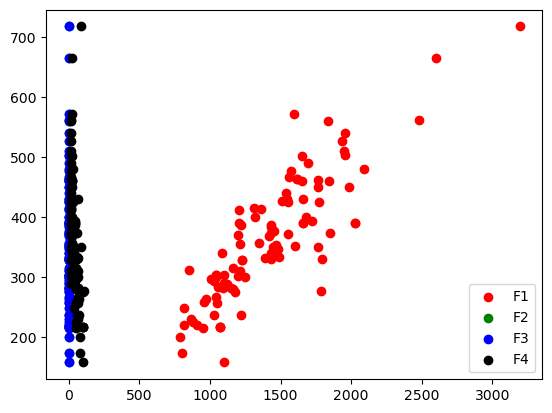

In [12]:
plt.scatter(X[0, :], Y, color="red", label="F1")
plt.scatter(X[1, :], Y, color="green", label="F2")
plt.scatter(X[2, :], Y, color="blue", label="F3")
plt.scatter(X[3, :], Y, color="black", label="F4")
plt.legend()
plt.show()

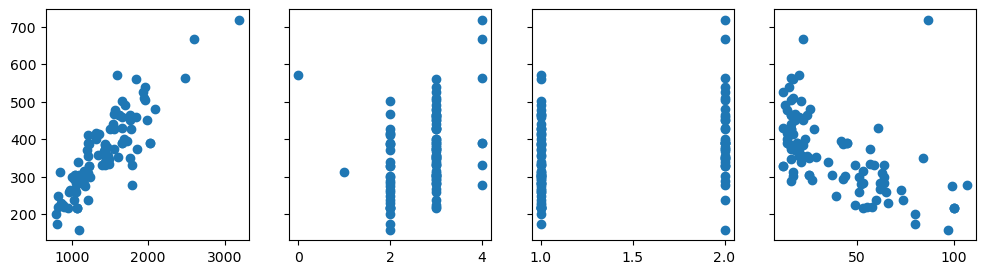

In [13]:
fig,ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X[i, :],Y)
plt.show()

In [14]:
params_, cost_ = train(X, Y.reshape((1, 99)), 0.01, 100)
print(params_)
print(cost_)

{'W': array([[nan, nan, nan, nan]]), 'b': array([[nan]])}
[84227.4355301572, 39362840858802.19, 1.874708106961793e+22, 8.928548883148726e+30, 4.252341197156889e+39, 2.0252345474823436e+48, 9.645451251791179e+56, 4.593775568678479e+65, 2.1878472478380363e+74, 1.0419916054474306e+83, 4.962624821709169e+91, 2.3635166533293594e+100, 1.1256565167143306e+109, 5.361090186678141e+117, 2.5532911294814313e+126, 1.2160391571267473e+135, 5.791549637999412e+143, 2.75830321851347e+152, 1.3136789151115514e+161, 6.256572085424027e+169, 2.9797763981606686e+178, 1.4191584883551474e+187, 6.758932704862218e+195, 3.219032383183955e+204, 1.5331073612454614e+213, 7.30162950016743e+221, 3.477499013141803e+230, 1.6562055615290958e+239, 7.887901194720067e+247, 3.75671877349708e+256, 1.789187718602788e+265, 8.521246559585029e+273, 4.058358000911363e+282, 1.9328474476583328e+291, 9.205445293590122e+299, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, i

/tmp/ipykernel_15387/263249595.py:2: RuntimeWarning: overflow encountered in power
  cost = np.mean(np.power(y_hat - Y_train, 2)) / 2
/home/sam/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [15]:
params_, cost_ = train(X, Y.reshape((1, 99)), 0.1, 100)
print(params_)
print(cost_)

{'W': array([[nan, nan, nan, nan]]), 'b': array([[nan]])}
[65641.16416202333, 3051079223348692.5, 1.4532372701865402e+26, 6.921808351333413e+36, 3.29687600473108e+47, 1.570310941717664e+58, 7.479433409505352e+68, 3.562474325373642e+79, 1.6968161388826002e+90, 8.081981078896556e+100, 3.849469407018721e+111, 1.8335126710784423e+122, 8.733070352178156e+132, 4.1595849856458535e+143, 1.981221558405861e+154, 9.436611770254969e+164, 4.4946836624454084e+175, 2.1408299628403406e+186, 1.0196830909567125e+197, 4.856778090883714e+207, 2.31329651666151e+218, 1.1018293761542996e+229, 5.248043065005035e+239, 2.499657080144002e+250, 1.1905934156636041e+261, 5.670828581574349e+271, 2.701030963091323e+282, 1.2865083397658675e+293, 6.12767395451426e+303, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,

/tmp/ipykernel_15387/263249595.py:2: RuntimeWarning: overflow encountered in power
  cost = np.mean(np.power(y_hat - Y_train, 2)) / 2


In [16]:
params_, cost_ = train(X, Y.reshape((1, 99)), 0.1, 100)
print(params_)
print(cost_)

{'W': array([[nan, nan, nan, nan]]), 'b': array([[nan]])}
[68730.32270973688, 3198039517011118.5, 1.5232348547955665e+26, 7.255208736569704e+36, 3.4556755083090522e+47, 1.6459475739871157e+58, 7.839692730987126e+68, 3.734066812797131e+79, 1.7785461038952312e+90, 8.471263108737427e+100, 4.034885488787022e+111, 1.9218268513974343e+122, 9.153713177279045e+132, 4.359938298862084e+143, 2.076650382389946e+154, 9.89114183520862e+164, 4.711177559489796e+175, 2.2439465904769415e+186, 1.068797819086741e+197, 5.090712866930479e+207, 2.4247202820525516e+218, 1.1549008164237708e+229, 5.500823767792379e+239, 2.6200572113204302e+250, 1.2479403231903895e+261, 5.9439734503342115e+271, 2.831130601498147e+282, 1.3484751487725071e+293, 6.422823538747393e+303, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 

/tmp/ipykernel_15387/263249595.py:2: RuntimeWarning: overflow encountered in power
  cost = np.mean(np.power(y_hat - Y_train, 2)) / 2


<p>z-score normalization</p>

In [17]:
x1 = np.array(X[0, :])
x2 = np.array(X[1, :])
x3 = np.array(X[2, :])
x4 = np.array(X[3, :])
x1 = (x1 - np.mean(x1)) / np.std(x1)
x2 = (x2 - np.mean(x2)) / np.std(x2)
x3 = (x3 - np.mean(x3)) / np.std(x3)
x4 = (x4 - np.mean(x4)) / np.std(x4)
Y_norm = (Y - np.mean(Y)) / np.std(Y)
X_norm = np.array([x1, x2, x3, x4])
print(X_norm.shape)

(4, 99)


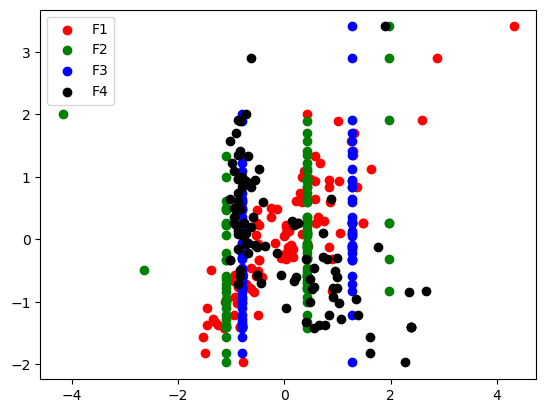

In [18]:
plt.scatter(X_norm[0, :], Y_norm, color="red", label="F1")
plt.scatter(X_norm[1, :], Y_norm, color="green", label="F2")
plt.scatter(X_norm[2, :], Y_norm, color="blue", label="F3")
plt.scatter(X_norm[3, :], Y_norm, color="black", label="F4")
plt.legend()
plt.show()

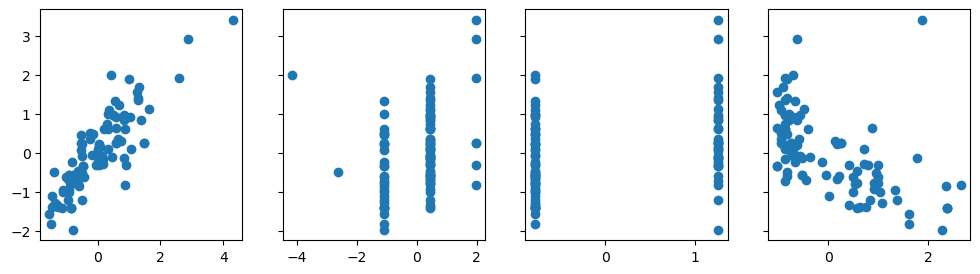

In [19]:
fig,ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm[i, :],Y_norm)
plt.show()

<p>Min-Max normalization</p>

In [20]:
x11 = np.array(X[0, :])
x21 = np.array(X[1, :])
x31 = np.array(X[2, :])
x41 = np.array(X[3, :])
x11 = (x11 - np.mean(x11)) / (np.max(x11) - np.min(x11))
x21 = (x21 - np.mean(x21)) / (np.max(x21) - np.min(x21))
x31 = (x31 - np.mean(x31)) / (np.max(x31) - np.min(x31))
x41 = (x41 - np.mean(x41)) / (np.max(x41) - np.min(x41))
Y_norm1 = (Y - np.mean(Y)) / (np.max(Y) - np.min(Y))
X_norm1 = np.array([x11, x21, x31, x41])
print(X_norm1.shape)

(4, 99)


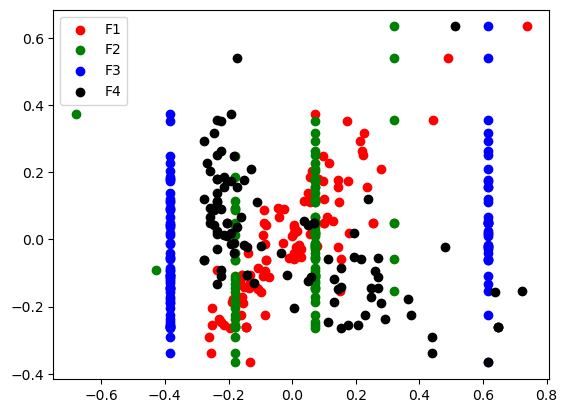

In [21]:
plt.scatter(X_norm1[0, :], Y_norm1, color="red", label="F1")
plt.scatter(X_norm1[1, :], Y_norm1, color="green", label="F2")
plt.scatter(X_norm1[2, :], Y_norm1, color="blue", label="F3")
plt.scatter(X_norm1[3, :], Y_norm1, color="black", label="F4")
plt.legend()
plt.show()

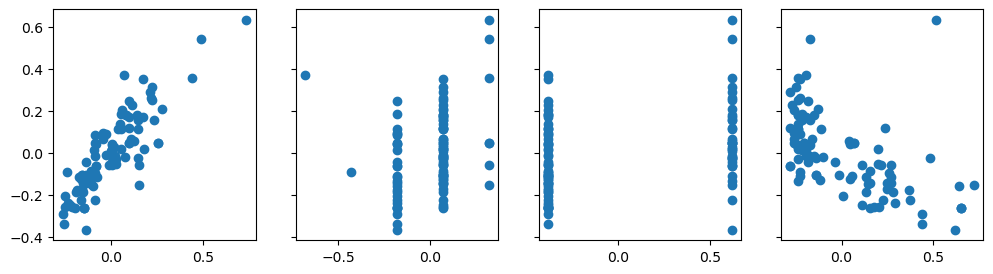

In [22]:
fig,ax = plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_norm1[i, :],Y_norm1)
plt.show()

In [23]:
params, cost = train(X_norm, Y_norm.reshape((1, 99)), 0.01, 100)
print(params)
print(cost)

{'W': array([[ 0.47932839,  0.05178343,  0.02735128, -0.30376215]]), 'b': array([[1.61641183e-16]])}
[0.49027765085781766, 0.4781132209629803, 0.46638518432236875, 0.4550762253618489, 0.44416973649908864, 0.43364978888785155, 0.42350110437640615, 0.41370902862957243, 0.4042595053660234, 0.39513905166447566, 0.386334734294331, 0.3778341470281801, 0.36962538889535174, 0.3616970433373919, 0.35403815822797846, 0.3466382267213441, 0.3394871688947713, 0.3325753141521559, 0.32589338435701054, 0.31943247766459365, 0.3131840530241125, 0.30713991532315565, 0.3012922011476693, 0.2956333651319035, 0.2901561668738154, 0.2848536583924385, 0.27971917210470376, 0.2747463093001348, 0.2699289290927353, 0.26526113783025035, 0.26073727894180504, 0.25635192320571454, 0.2520998594200178, 0.24797608545901126, 0.2439757996997557, 0.24009439280319614, 0.23632743983517118, 0.23267069271320373, 0.2291200729655491, 0.2256716647895398, 0.22232170839680607, 0.21906659363346578, 0.21590285386387417, 0.21282716010699

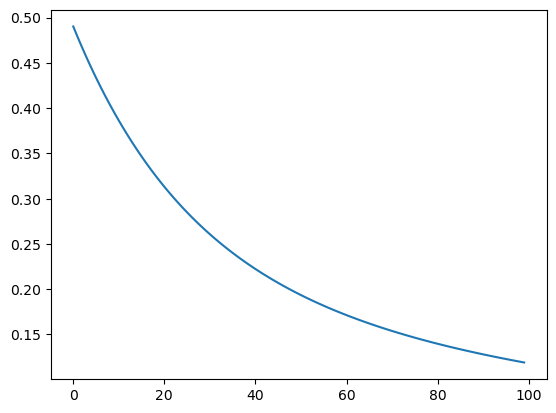

In [24]:
plt.plot(cost)
plt.show()

In [25]:
params1, cost1 = train(X_norm, Y_norm.reshape((1, 99)), 0.03, 100)
print(params1)
print(cost1)

{'W': array([[ 0.77565243, -0.06904386, -0.1353284 , -0.39519712]]), 'b': array([[3.01560124e-16]])}
[0.484739329922897, 0.44984942032874686, 0.4186178848964799, 0.39061901095667656, 0.36547817564488394, 0.3428656482534423, 0.32249114770657406, 0.30409906297713607, 0.2874642555263672, 0.27238837273420197, 0.2586966099655834, 0.24623486653542587, 0.23486724752110572, 0.22447386924042043, 0.21494893136473825, 0.20619902315925584, 0.19814163531185047, 0.19070385229650466, 0.1838212032759962, 0.17743665223353344, 0.17149971037994102, 0.16596565595198662, 0.16079484833365748, 0.15595212502655723, 0.15140627139519944, 0.14712955434164166, 0.1430973121425089, 0.1392875936283484, 0.1356808407165245, 0.13225960903864173, 0.12900832204416662, 0.12591305452439985, 0.12296134199477729, 0.12014201280704415, 0.11744504024350778, 0.1148614121797991, 0.11238301619602707, 0.11000253827387912, 0.10771337344346983, 0.10550954694241008, 0.1033856446240233, 0.10133675150483622, 0.09935839747600565, 0.09744

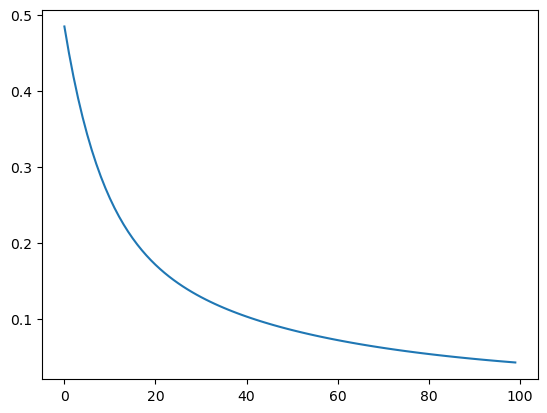

In [26]:
plt.plot(cost1)
plt.show()

In [27]:
params2, cost2 = train(X_norm, Y_norm.reshape((1, 99)), 0.06, 100)
print(params2)
print(cost2)

{'W': array([[ 0.95772909, -0.15441935, -0.25282484, -0.38252605]]), 'b': array([[3.37146136e-16]])}
[0.502416449277335, 0.4319428947548074, 0.3756826762245569, 0.3304505322992833, 0.29379891670002695, 0.26384508019321096, 0.2391388878186738, 0.21856175346716183, 0.2012493471258517, 0.18653246580614258, 0.17389178444830664, 0.16292321503405752, 0.15331137483981153, 0.14480925480933213, 0.13722262961024426, 0.1303980950430089, 0.12421388127147533, 0.11857279106406363, 0.11339676555054856, 0.10862269711688442, 0.10419919853514163, 0.10008410578987535, 0.09624254430394456, 0.09264542819448889, 0.08926829271161159, 0.08609038334903556, 0.0830939429634439, 0.080263651892493, 0.0775861865096889, 0.07504986965291191, 0.07264439248939795, 0.07036059207424851, 0.06819027245881082, 0.06612605996686023, 0.06416128537706428, 0.06228988737999808, 0.06050633293190067, 0.05880555109325463, 0.05718287768531693, 0.055634008673325755, 0.05415496063058408, 0.05274203698308981, 0.051391799002906205, 0.050

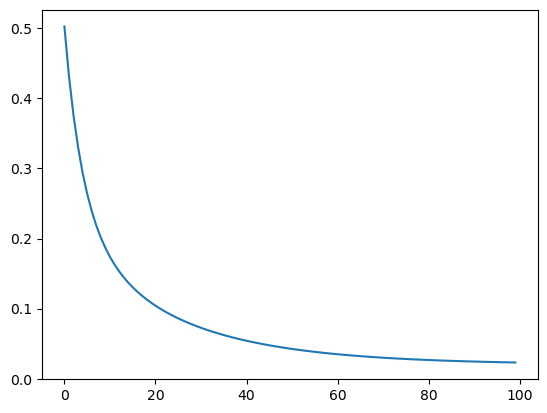

In [28]:
plt.plot(cost2)
plt.show()

In [29]:
params3, cost3 = train(X_norm, Y_norm.reshape((1, 99)), 0.1, 100)
print(params3)
print(cost3)

{'W': array([[ 1.0350376 , -0.19118284, -0.29907266, -0.36942001]]), 'b': array([[3.33235123e-16]])}
[0.49706632399531264, 0.38462181561990305, 0.3084203858069731, 0.25551550506968335, 0.21773572339996117, 0.1899028894358928, 0.1687184860587005, 0.15206699709973628, 0.13857968057514208, 0.12736102938552732, 0.1178169370945768, 0.10954650009336343, 0.1022736815811669, 0.09580398162635416, 0.08999682396145145, 0.08474784544811563, 0.07997744486512068, 0.07562330434140067, 0.0716354453116095, 0.06797291215236749, 0.06460150972843309, 0.06149223024257858, 0.05862013642480839, 0.05596355118289295, 0.053503456467010754, 0.05122303759427707, 0.04910733071734983, 0.0471429449435446, 0.0453178396023792, 0.043621143071756865, 0.04204300351034107, 0.040574464504558296, 0.03920736046675532, 0.03793422789964792, 0.03674822955344948, 0.03564308916398772, 0.034613034949962845, 0.03365275041643749, 0.03275733129403286, 0.03192224766256661, 0.031143310480256762, 0.03041664187660902, 0.02973864867696165

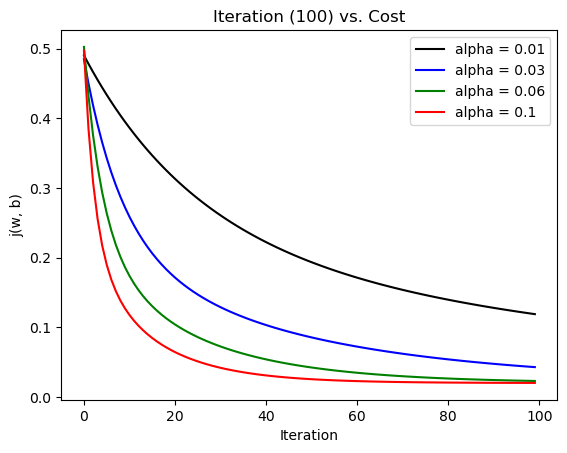

In [30]:
plt.plot(cost, color="black", label="alpha = 0.01")
plt.plot(cost1, color="blue", label="alpha = 0.03")
plt.plot(cost2, color="green", label="alpha = 0.06")
plt.plot(cost3, color="red", label="alpha = 0.1")
plt.xlabel("Iteration")
plt.ylabel("j(w, b)")
plt.title("Iteration (100) vs. Cost")
plt.legend()
plt.show()